In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

police_killings = pd.read_csv('police_killings.csv', encoding='latin1')

police_killings.head()

,name,age,gender,raceethnicity,month,day,year,streetaddress,city,state,...,share_hispanic,p_income,h_income,county_income,comp_income,county_bucket,nat_bucket,pov,urate,college
0,A'donte Washington,16,Male,Black,February,23,2015,Clearview Ln,Millbrook,AL,...,5.6,28375,51367.0,54766,0.937936,3.0,3.0,14.1,0.097686,0.168510
1,Aaron Rutledge,27,Male,White,April,2,2015,300 block Iris Park Dr,Pineville,LA,...,0.5,14678,27972.0,40930,0.683411,2.0,1.0,28.8,0.065724,0.111402
2,Aaron Siler,26,Male,White,March,14,2015,22nd Ave and 56th St,Kenosha,WI,...,16.8,25286,45365.0,54930,0.825869,2.0,3.0,14.6,0.166293,0.147312
3,Aaron Valdez,25,Male,Hispanic/Latino,March,11,2015,3000 Seminole Ave,South Gate,CA,...,98.8,17194,48295.0,55909,0.863814,3.0,3.0,11.7,0.124827,0.050133
4,Adam Jovicic,29,Male,White,March,19,2015,364 Hiwood Ave,Munroe Falls,OH,...,1.7,33954,68785.0,49669,1.384868,5.0,4.0,1.9,0.063550,0.403954


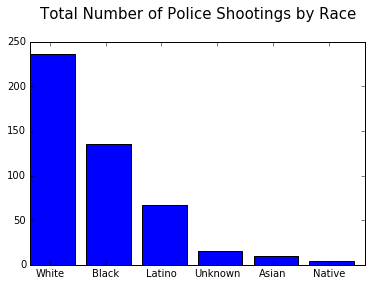

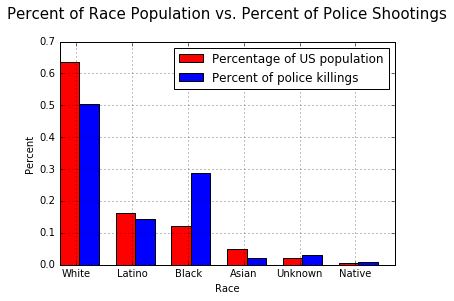

In [3]:
# Count how many times each race appears in the data set
count_by_race = police_killings['raceethnicity'].value_counts()


# This plot shows total number of people killed by race
plt.bar(range(6), count_by_race)
plt.title("Total Number of Police Shootings by Race", 
         fontsize=15, y=1.08)
race_labels = ['White', 'Black', 'Latino', 'Unknown', 'Asian', 'Native']
plt.xticks(np.arange(0,6,1)+0.35, race_labels)
plt.show()

'''
# To see how representative of the population this is
# We need to compare the percentage of killings to the percentage
# Each race represents in American society
'''

# https://en.wikipedia.org/wiki/Demography_of_the_United_States#Race_and_ethnicity
us_race_demo = {'Asian/Pacific Islander': 0.049,
                'Black': 0.122,
                'Hispanic/Latino': 0.163 ,
                'Native American': 0.007,
                'Unknown': 0.022,
                'White': 0.637}

# Creating a pd Series and sorting to prep for a DataFrame                
race_demo_ser = pd.Series(us_race_demo)
race_demo_ser = race_demo_ser.sort_index()
percent_of_killings = count_by_race / sum(count_by_race)
percent_of_killings = percent_of_killings.sort_index()

# Combining the Series, sorting new DataFrame by Demography
percentages = pd.concat([percent_of_killings, race_demo_ser], axis=1)
percentages.columns = ['Percent Killed', 'Demography']
percentages = percentages.sort_values(by='Demography', ascending=False)
races = percentages.index.tolist()

# Plotting the graph
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax2 = fig.add_subplot(1,1,1)

offset = np.arange(6) + 0.35
bar1 = ax1.bar(range(6), percentages['Demography'], width=0.35, color='red')
bar2 = ax2.bar(offset, percentages['Percent Killed'], width=0.35)
plt.title("Percent of Race Population vs. Percent of Police Shootings", 
         fontsize=15, y=1.08)
plt.xlabel('Race')
plt.ylabel('Percent')
xlabels = ["White", "Latino", "Black", "Asian", "Unknown", "Native"]
plt.xticks(np.arange(0.30,6.30, 1), xlabels, rotation= 0)
plt.legend((bar1, bar2), ('Percentage of US population', 'Percent of police killings'), loc='upper right')
plt.grid()
plt.show()


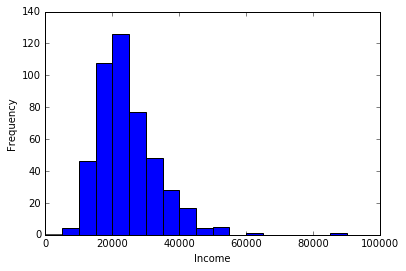

Median Income:  22348.0


In [4]:
# Get income data. Create a dataframe that does not contain strings. 
income = police_killings[police_killings['p_income'] != '-']
income.is_copy = False # Avoid SettingWithCopyWarning
income['p_income'] = income['p_income'].astype(int)

plt.hist(income['p_income'], bins=np.arange(0,100000,5000))
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

print("Median Income: " , np.median(income['p_income']))


In [8]:
# Read in demography data set, count killings by state code and combine the datasets
state_pop = pd.read_csv('state_population.csv')
counts = police_killings['state_fp'].value_counts()
states = pd.DataFrame({"STATE": counts.index, "killings": counts})
states.reset_index(drop=True, inplace=True)
states = states.merge(state_pop, how='left', on='STATE')

# Setting index to the name of the states
states.set_index("NAME", inplace=True)

# Create a rate statistic showing police killing per million people
states['pop_millions'] = states['POPESTIMATE2015'] /1000000
states['rate'] = states['killings'] / states['pop_millions']
print('Ten most violent states')
print(states['rate'].sort_values(ascending=False,inplace=True)[:10])

Ten most violent states
NAME
Oklahoma      5.624674
Arizona       3.661359
Nebraska      3.164240
Hawaii        2.794071
Alaska        2.708442
Idaho         2.417021
New Mexico    2.397956
Louisiana     2.355095
Colorado      2.199182
Delaware      2.114312
Name: rate, dtype: float64


In [9]:
# Creating a new Dataframe just containing the shares of whites, blacks, and hispanics
pk = police_killings[
                (police_killings['share_white'] != '-') &
                (police_killings['share_black'] != '-') &
                (police_killings['share_hispanic'] != '-')]
pk.is_copy = False
pk['share_white'] = pk['share_white'].astype(float)
pk['share_black'] = pk['share_black'].astype(float)
pk['share_hispanic'] = pk['share_hispanic'].astype(float)


# The top ten states, high and low, have been grouped by their FP codes.
highest_rates = [40, 4, 31, 15, 2, 16, 35, 22, 8, 10]
lowest_rates = [55, 39, 17, 23, 33, 25, 36, 19, 42, 9]

# Creating DataFrames for entries with states in one of the top tens
lowest_states = pk[pk.state_fp.isin(lowest_rates)]
highest_states = pk[pk.state_fp.isin(highest_rates)]               

print(lowest_states[['pop','county_income','share_white','share_black','share_hispanic']].mean())
print(highest_states[['pop','county_income','share_white','share_black','share_hispanic']].mean())


pop                4153.472727
county_income     55037.963636
share_white          60.132727
share_black          21.610909
share_hispanic       12.994545
dtype: float64
pop                4315.750000
county_income     48706.967391
share_white          55.652174
share_black          11.532609
share_hispanic       20.693478
dtype: float64
